# Linear Regression
We will build a machine learning pipeline using a linear regression model. In particular, you should do the following:
Steps:-
- Load the `canada_per_capita_income` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 
- Conduct data exploration, data preprocessing, and feature engineering if necessary. 
- Train and test a linear regression model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
- Check the documentation to identify the most important hyperparameters, attributes, and methods of the model. Use them in practice.
- Give a Conclusion to the of the study.

## Importing Required Libraries

I start by importing the necessary libraries for my data analysis and machine learning tasks in Python. The `pandas` library helps me handle data efficiently, so I import it as `pd`.



In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from   sklearn.model_selection import train_test_split
import seaborn as sns
from   sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
# This is a test

## Data Collection

### Reading Data for Per Capita Income Prediction

Then, I read a CSV file containing data on Canada's per capita income over the years.\
- The file path is specified as `.../canada_per_capita_income.csv`.
- Using `pd.read_csv()`, I load the data from the CSV file into a pandas DataFrame named `df`.\
- This DataFrame serves as the primary data structure for my analysis.
- Once the data is loaded, I can explore its structure, characteristics, and start preparing it for further analysis or machine learning model development.


In [55]:
df = pd.read_csv('/Users/jasonjoelpinto/Documents/GitHub/python-datascience-projects/008. predicting_per_capita_income_based_on_year/dataset/canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


### Understanding Data Dimensions

After loading the dataset into the DataFrame `df`, I'm interested in understanding its dimensions, which helps me grasp the size of the dataset.

Using the `.shape` attribute of the DataFrame, I retrieve a tuple containing two values: the number of rows and the number of columns in the dataset.

In [56]:
df.shape

(47, 2)

## Data Exploration

### Explanation:

`df.info()`:
- This line calls the `info()` method on the DataFrame `df`.
- The `info()` method provides a concise summary of the DataFrame, including the number of non-null values, data types, and memory usage.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


### Explanation:

`df.dtypes`:
- This line retrieves the data types of each column in the DataFrame `df`.
- The `dtypes` attribute in pandas DataFrame provides information about the data types of the columns.

In [75]:
df.dtypes

year                         int64
per capita income (US$)    float64
dtype: object

### Explanation:

`df.describe()`:
- This line generates descriptive statistics summarizing the central tendency, dispersion, and shape of the numerical columns in the DataFrame `df`.
- The `describe()` function provides statistics such as count, mean, standard deviation, minimum, maximum, and quartile values for each numerical column in the DataFrame.

In [79]:
df.describe()

# You can transpose this using this code `df.describe().T`, if you have more data.

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='per capita income (US$)', ylabel='Count'>

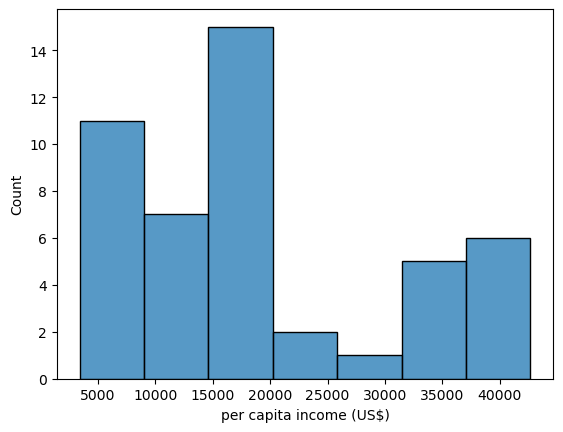

In [85]:
sns.histplot(data=df, x="per capita income (US$)")


In [145]:
sns.set_theme()
# For the image quality of the graphic. 
sns.set_theme(rc={"figure.dpi":400})


In [ ]:
# For the size of the graphics
sns.set_theme(rc={"figure.figsize":(6,3)}

<Axes: xlabel='year', ylabel='per capita income (US$)'>

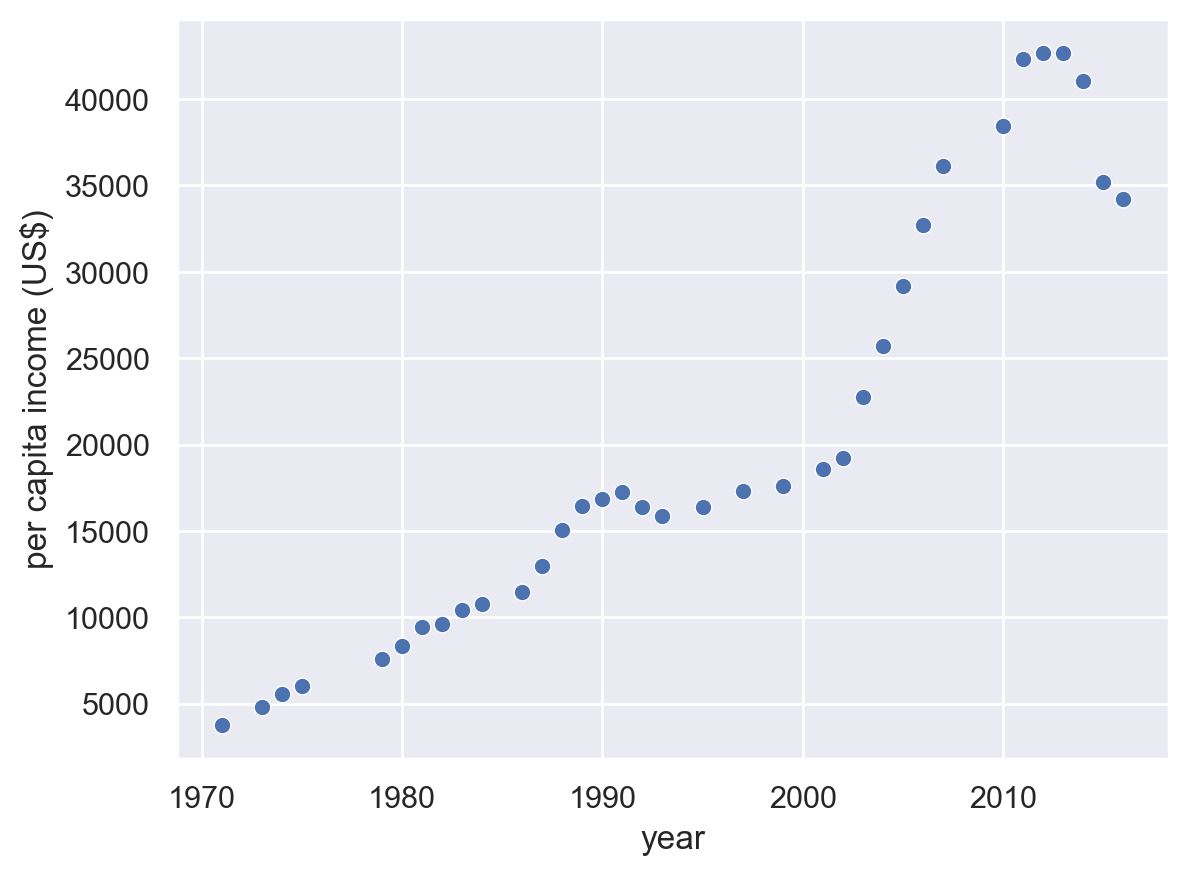

In [113]:
sns.scatterplot(x=X_train,y=y_train)

## Data Pre-Processing

### Splitting Data for Training and Testing

Now we have reached a crucial step: splitting the data into training and testing sets. This ensures that I can train my model on one subset of the data and evaluate its performance on another, unseen subset.

Using the `train_test_split` function from the `sklearn.model_selection` module, I split my dataset into training and testing sets. Specifically, I split the features (`df['year']`) and the target variable (`df['per capita income (US$)']`) into training and testing sets, with a test size of 0.25 (25%).

The resulting sets are:

- `X_train`: The training features, representing years.
- `X_test`: The testing features, also representing years.
- `y_train`: The target variable for training, representing per capita income (US$).
- `y_test`: The target variable for testing, also representing per capita income (US$).

After the split, I inspect the shapes of these sets to ensure they align correctly. The shapes are as follows:

- Shape of X_train: (shape of the training feature set)
- Shape of X_test: (shape of the testing feature set)
- Shape of y_train: (shape of the training target set)
- Shape of y_test: (shape of the testing target set)

These shapes provide insights into the distribution of data between training and testing sets, ensuring that my model receives a balanced and representative subset for both training and evaluation.

In [124]:
X_train , X_test, y_train, y_test = train_test_split(df.year,df['per capita income (US$)'], test_size=0.25)

print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of y_train is: {y_train.shape}")
print(f"Shape of y_train is: {y_test.shape}")

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


Shape of X_train is: (35,)
Shape of X_test is: (12,)
Shape of y_train is: (35,)
Shape of y_train is: (12,)


## Feature Engineering

I am skipping the Feature Engineering step as I do not see any scope for transforming our data.

## Model Training

In [125]:
X_train

array([[1972],
       [2013],
       [1986],
       [1987],
       [1975],
       [1982],
       [1974],
       [2010],
       [1994],
       [1997],
       [2002],
       [2012],
       [1971],
       [1988],
       [2007],
       [1993],
       [1990],
       [2009],
       [2003],
       [2011],
       [1995],
       [1998],
       [1973],
       [1978],
       [1991],
       [1996],
       [2016],
       [2000],
       [2014],
       [1981],
       [2001],
       [2005],
       [1999],
       [2008],
       [2006]])

In [126]:
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [129]:
y_predicted = reg.predict(X_test)
y_predicted

array([[17971.4882572 ],
       [37779.98264623],
       [ 4191.66607352],
       [ -975.76724535],
       [ 6775.38273296],
       [28306.35489495],
       [11081.57716536],
       [15387.77159776],
       [11942.81605184],
       [ 7636.62161944],
       [10220.33827888],
       [ 5052.90496   ]])

## Model Assessment

In [127]:
reg.coef_

array([[861.23888648]])

In [128]:
reg.intercept_

array([-1697616.37361014])

We can also plot and check how close is it to our actuall data points

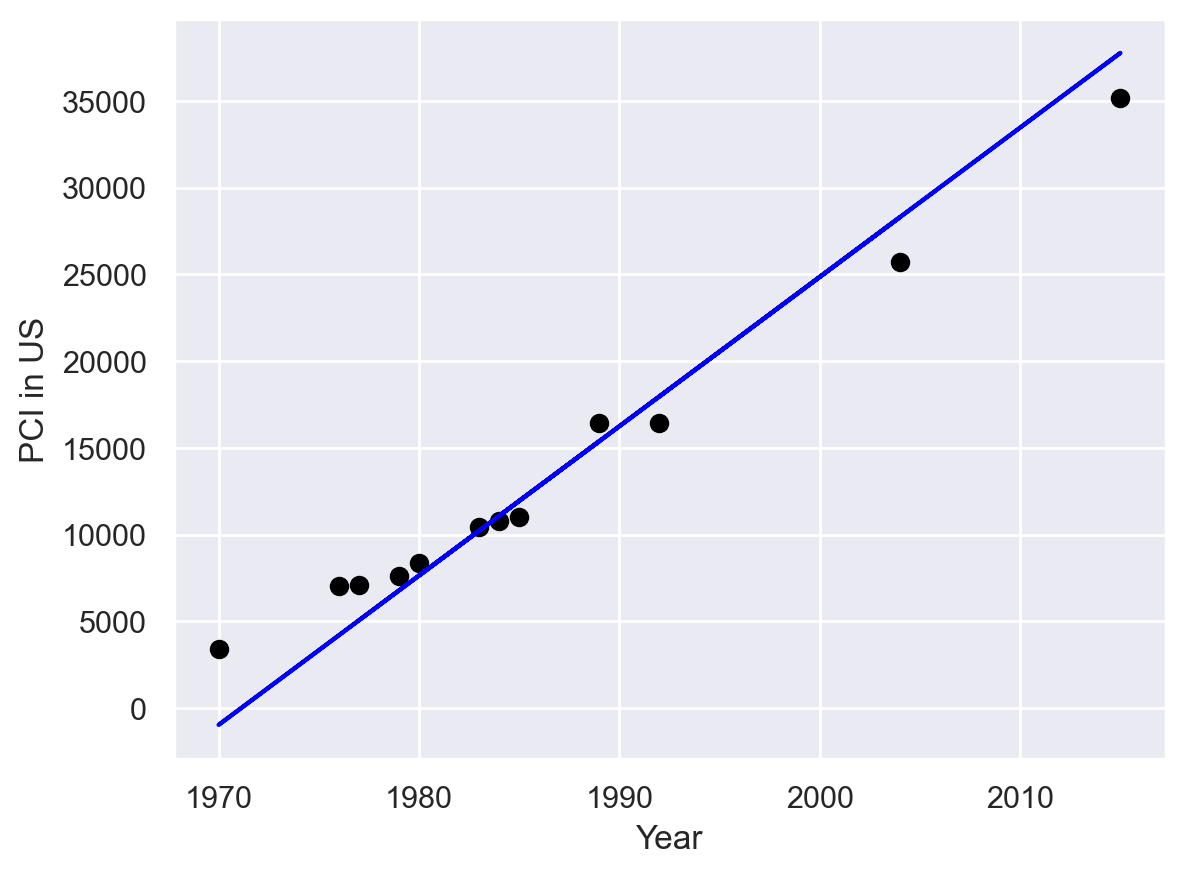

In [136]:
%matplotlib inline
plt.xlabel("Year")
plt.ylabel("PCI in US")
plt.scatter(X_test,y_test,color='black')
plt.plot(X_test,y_predicted,color='blue')

/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jasonjoelpinto/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='PCI in US'>

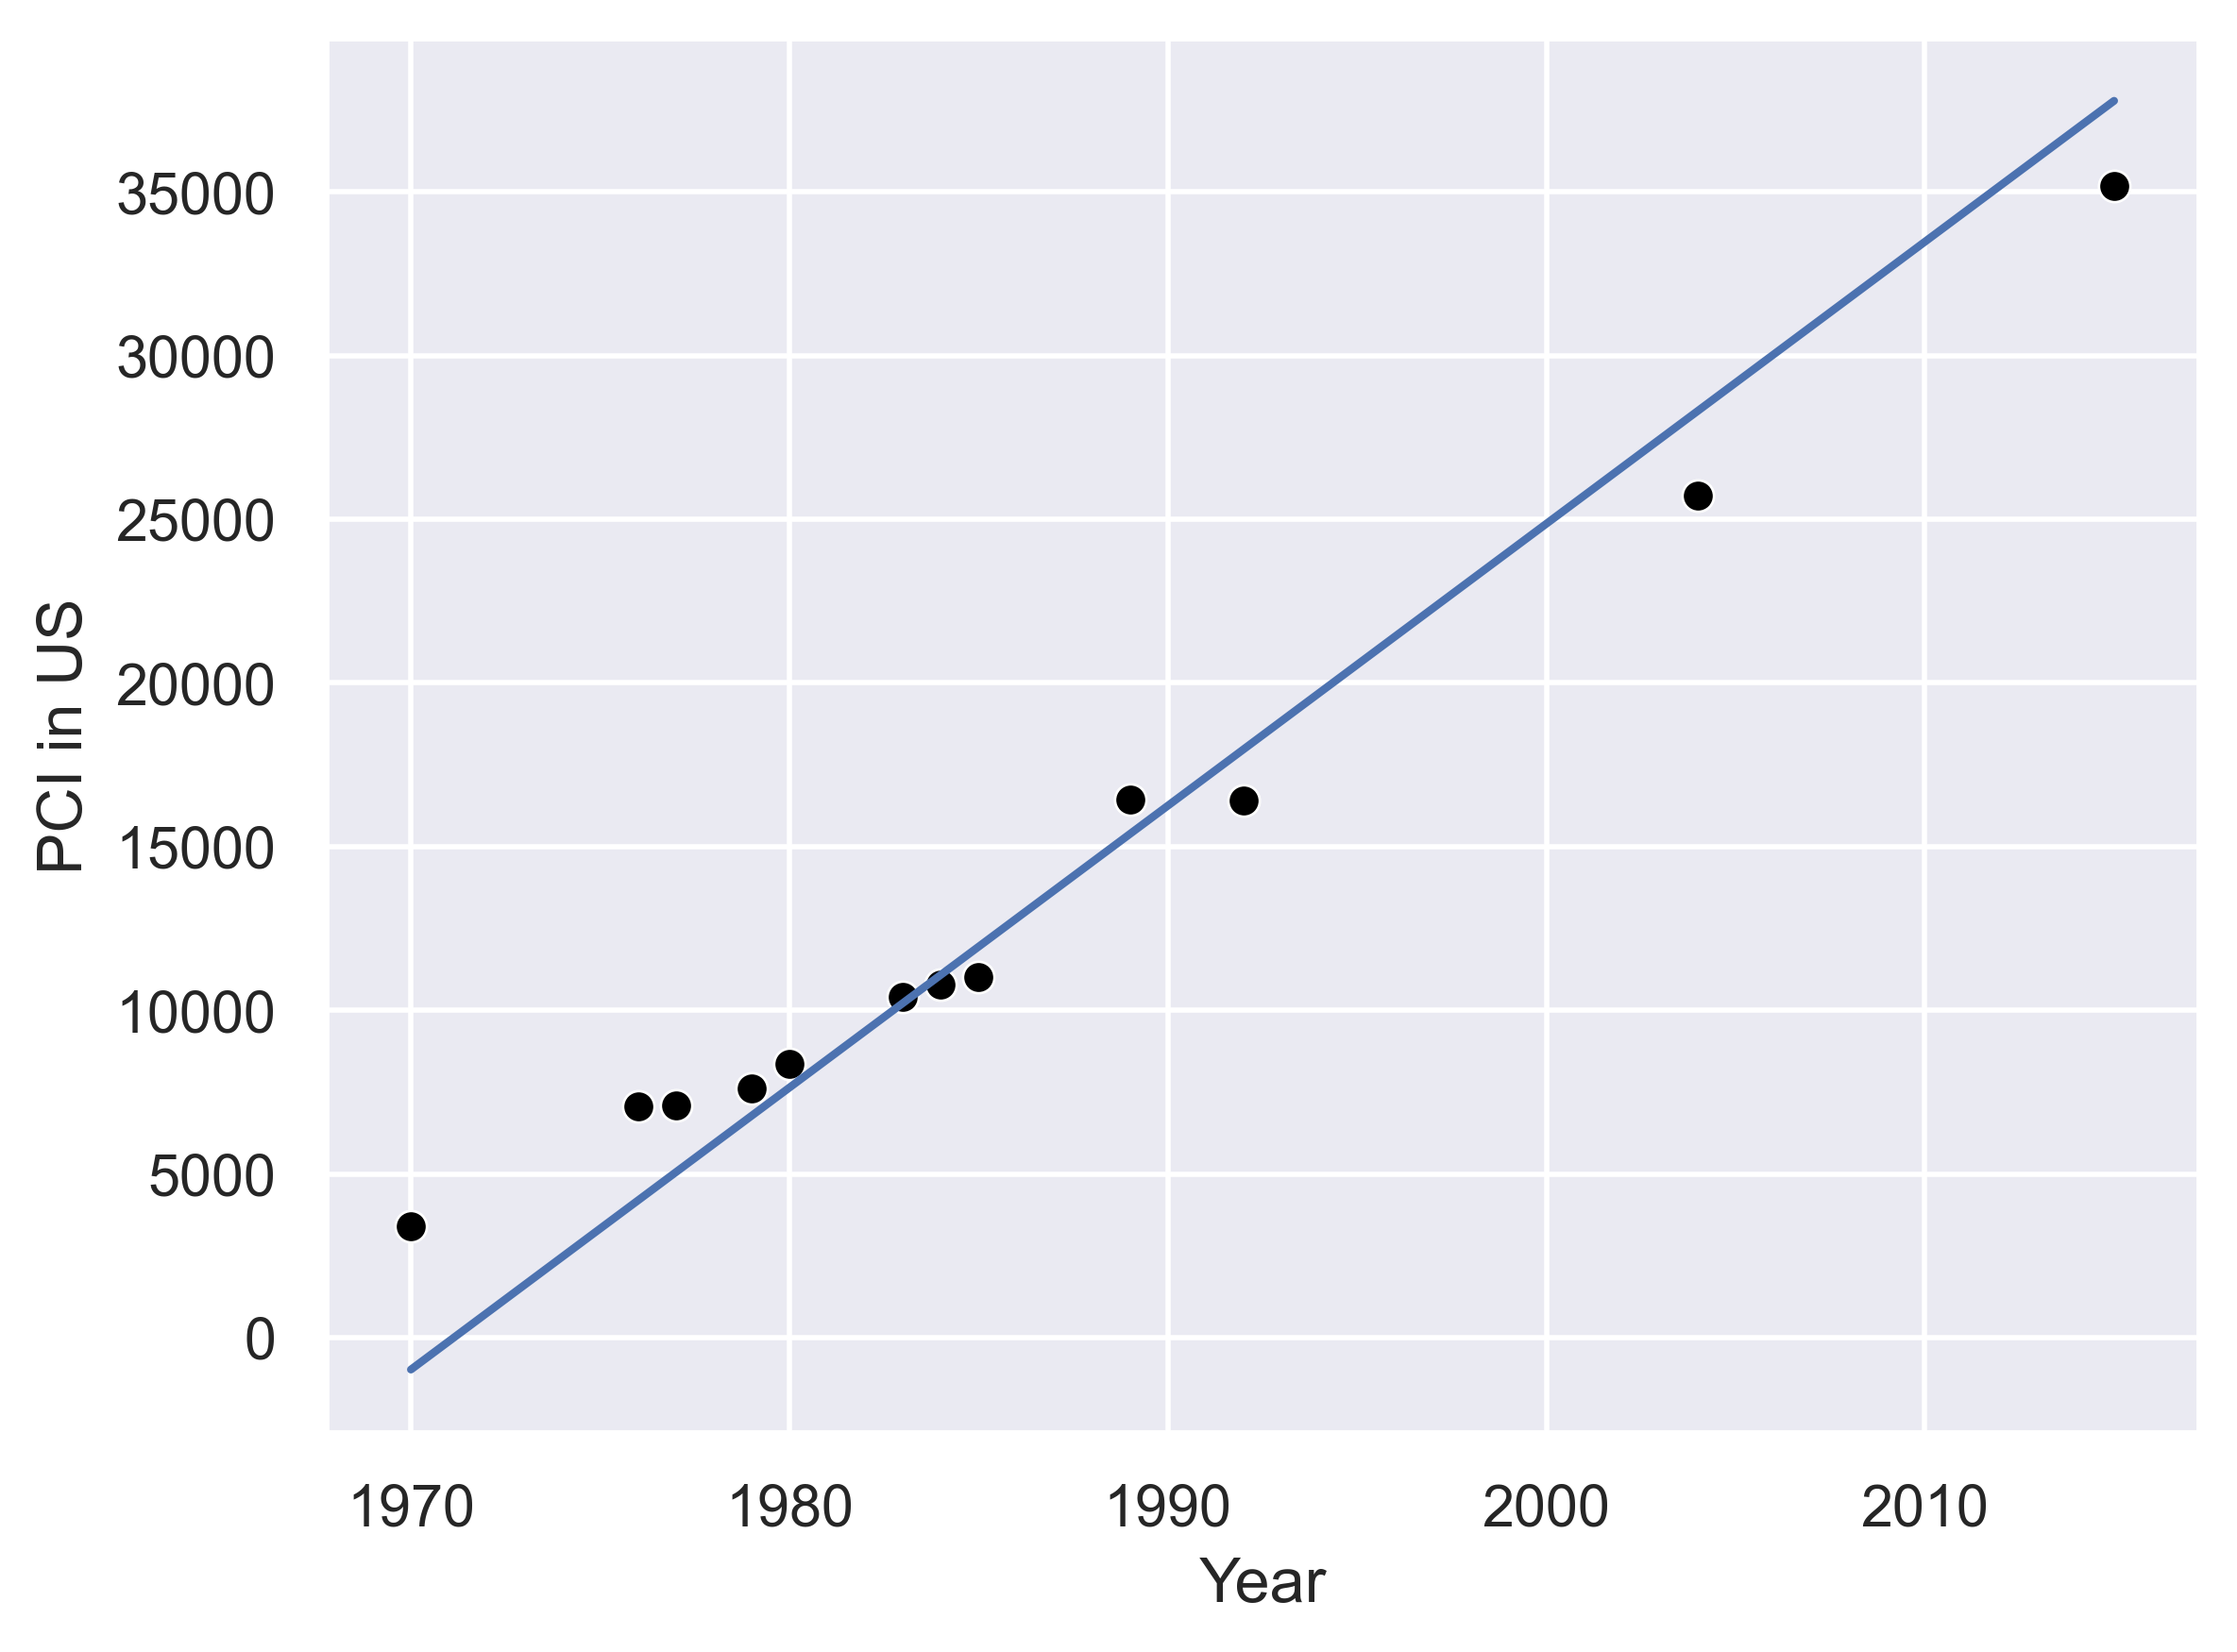

In [146]:
X_test = X_test.ravel()
y_test = y_test.ravel()
y_predicted = y_predicted.ravel()
plt.xlabel("Year")
plt.ylabel("PCI in US")
sns.scatterplot(x=X_test,y=y_test,color='black')
sns.lineplot(x=X_test,y=y_predicted)

Now that we have seen the predition line and the scatter plots. We can measure the 

In [155]:
# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
# y_predicted = y_predicted.reshape(-1,1)

MAE = mean_absolute_error(y_test,y_predicted)
MSE = mean_squared_error(y_test,y_predicted)
R2 = r2_score(y_test,y_predicted)

print(f"MAE is {MAE}")
print(f"MSE is {MSE}")
print(f"R2  is {R2}")


MAE is 1670.1080565300515
MSE is 4228396.392984286
R2  is 0.9438900184895128


## Conclusion